<a href="https://colab.research.google.com/github/alexandra-hidalgo/datasci_6_anova/blob/main/ANOVA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00


### Download Packages

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from faker import Faker
import scipy.stats as stats

In [ ]:
import seaborn as sns

### Downloading data

In [ ]:
Diabetes = pd.read_csv('diabetic_data.csv')
Diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
Diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:


# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets




/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
dataframe1 = pd.DataFrame(X)
dataframe1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
dataframe2 = pd.DataFrame(y)
dataframe2

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [ ]:
df = pd.merge(dataframe1, dataframe2, left_index=True, right_index=True)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Variables of Interest

In [ ]:
Diabetes = df[['gender', 'age', 'time_in_hospital']]
Diabetes

,gender,age,time_in_hospital
0,Female,[0-10),1
1,Female,[10-20),3
2,Female,[20-30),2
3,Male,[30-40),2
4,Male,[40-50),1
...,...,...,...
101761,Male,[70-80),3
101762,Female,[80-90),5
101763,Male,[70-80),1
101764,Female,[80-90),10


In [ ]:
Diabetes.age

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object

In [81]:
Diabetes.gender

0         Female
1         Female
2         Female
3           Male
4           Male
           ...  
101761      Male
101762    Female
101763      Male
101764    Female
101765      Male
Name: gender, Length: 101766, dtype: object

### Variables of choice
I choose these variables becase I wsnt to determine how the age in the gender had an inpcat in the time these diabetic patients spend hospitalized.

# Normality

In [ ]:
# fake = Faker()

In [ ]:
# seed = 42
# np.random.seed(seed)
# Faker.seed(seed)

In [107]:
# # Number of samples
# n = 100

In [108]:
# Create data frame
df = pd.DataFrame({
    'ID': [fake.uuid4() for _ in range(n)],
    'age': np.concatenate([
        np.random.normal(0, 10, int(n/4)),
        np.random.normal(10, 20, int(n/4)),
        np.random.normal(20, 30, int(n/4)),
        np.random.normal(30, 40, int(n/4)),
        np.random.normal(90, 100, int(n/4))
    ]),
    'gender Status': np.concatenate([
        ['Male'] * int(n/2),
        ['Female'] * int(n/2),
        ['']
    ]),
    'age Status': np.concatenate([
        ['Young', 'Older'] * int(n/2)
    ])
})

NameError: ignored

In [ ]:
# Shuffle the rows to make it more realistic
Diabetes = Diabetes.sample(frac=1).reset_index(drop=True)

In [100]:
Diabetes.time_in_hospital

0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64

In [ ]:
groups = Diabetes.groupby(['gender', 'age'])
groups

In [101]:
for (gender, age), group_Diabetes in groups:
    _, p_value = stats.shapiro(group_Diabetes['time_in_hospital'])
    print(f"Group ({gender}, {age}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


Group (Female, [0-10)):
P-value from Shapiro-Wilk Test: 2.0656632386817364e-06

Group (Female, [10-20)):
P-value from Shapiro-Wilk Test: 5.4530704270999036e-24

Group (Female, [20-30)):
P-value from Shapiro-Wilk Test: 1.4458526332171403e-33

Group (Female, [30-40)):
P-value from Shapiro-Wilk Test: 8.284476521088319e-42

Group (Female, [40-50)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [50-60)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [60-70)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [70-80)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [80-90)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [90-100)):
P-value from Shapiro-Wilk Test: 5.019741076965262e-33

Group (Male, [0-10)):
P-value from Shapiro-Wilk Test: 1.1457602511200093e-07

Group (Male, [10-20)):
P-value from Shapiro-Wilk Test: 5.368671776572118e-22

Group (Male, [20-30)):
P-value from Shapiro-Wilk Test: 6.224277414122974e-24

Group (Male, [30-40)):
P-value from Shapiro-Wilk Test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: ignored

# Levene Test

In [ ]:
Diabetes = pd.DataFrame()

In [99]:
statistic, p_value = stats.levene(
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '0-10'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '10-20'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '20-30'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '30-40'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '90-100'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '0-10'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '10-20'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '20-30'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '30-40'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '90-100'],
)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# ANOVA

## Variables of Interest

dv = time_in_hospital iv1 = gender iv2 = age

In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
Diabetes1 = pd.DataFrame(X)
Diabetes1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
Diabetes.to_csv('diabetes.csv')

In [ ]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


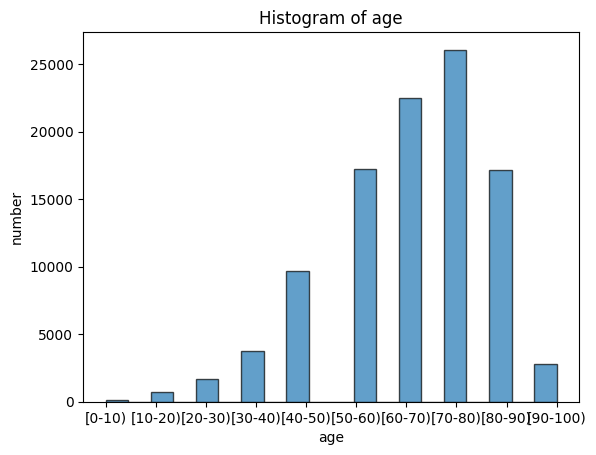

In [ ]:
plt.hist(df['age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('number')
plt.show()


In [83]:

for (gender, age), group_Diabetes in groups:
    _, p_value = stats.shapiro(group_Diabetes['time_in_hospital'])
    print(f"Group ({gender}, {age}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


Group (Female, [0-10)):
P-value from Shapiro-Wilk Test: 2.0656632386817364e-06

Group (Female, [10-20)):
P-value from Shapiro-Wilk Test: 5.4530704270999036e-24

Group (Female, [20-30)):
P-value from Shapiro-Wilk Test: 1.4458526332171403e-33

Group (Female, [30-40)):
P-value from Shapiro-Wilk Test: 8.284476521088319e-42

Group (Female, [40-50)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [50-60)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [60-70)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [70-80)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [80-90)):
P-value from Shapiro-Wilk Test: 0.0

Group (Female, [90-100)):
P-value from Shapiro-Wilk Test: 5.019741076965262e-33

Group (Male, [0-10)):
P-value from Shapiro-Wilk Test: 1.1457602511200093e-07

Group (Male, [10-20)):
P-value from Shapiro-Wilk Test: 5.368671776572118e-22

Group (Male, [20-30)):
P-value from Shapiro-Wilk Test: 6.224277414122974e-24

Group (Male, [30-40)):
P-value from Shapiro-Wilk Test

ValueError: ignored

In [95]:
df['age'] = df['age'].astype(str)
df['gender'] = df['gender'].astype(str)


In [98]:
# Levene's Test
stats.levene(
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '0-10'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '10-20'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '20-30'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '30-40'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Female'][Diabetes['age'] == '90-100'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '0-10'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '10-20'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '20-30'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '30-40'],
    Diabetes['time_in_hospital'][Diabetes['gender'] == 'Male'][Diabetes['age'] == '90-100'],
)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [97]:
model = ols('time_in_hospital ~ C(gender) * C(age)', data=df).fit()

In [91]:
# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq        df             F         PR(>F)
C(gender)        -4.042776e-08       2.0 -2.297277e-09   1.000000e+00
C(age)            1.654694e+04       9.0  2.089484e+02  7.407718e-179
C(gender):C(age)  2.903281e+02      18.0  1.833076e+00   4.315834e-02
Residual          8.952514e+05  101744.0           NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 11
  warnings.warn('covariance of constraints does not have full '
